# Questions


#### 1 -What is a Multi-Layer Perceptron (MLP) and how does it differ from a single-layer perceptron?

#### 2- Explain the architecture of a Multi-Layer Perceptron (MLP) and the role of input, hidden, and output layers.


#### 3- How are weights initialized in a Multi-Layer Perceptron (MLP) and why is it important?

#### 4- What is the purpose of activation functions in a Multi-Layer Perceptron (MLP)? Name some commonly used activation functions.

#### 5- What is backpropagation and how is it used to train a Multi-Layer Perceptron (MLP)


#### 6- How do you choose the number of hidden layers and neurons in each layer of a Multi-Layer Perceptron (MLP)?




Ans1.
- Multilayer Perceptron is neural network architechure introduced in 1980  in order to solve the problem faced by single layer perceptron.
- Single layer percepetron lacked learninig capabilty which means it only could work with linearly separable data.
- in order to solve this issue, we intruducted multiple layered nerual network. This has 3 layers input layer, hidden layers and output layers
- With help of this we were able to improve the perfiormance of the model as compared to single-layer perceptron

Ans2.
- Multi- layer perceptron(MLP) architechture as 3 layers : Input layer, Output layer, Hidden layer
- In input layer, we provide the input from the dataset. output of these node are passed to nodes of hidden layer which is given by formula
 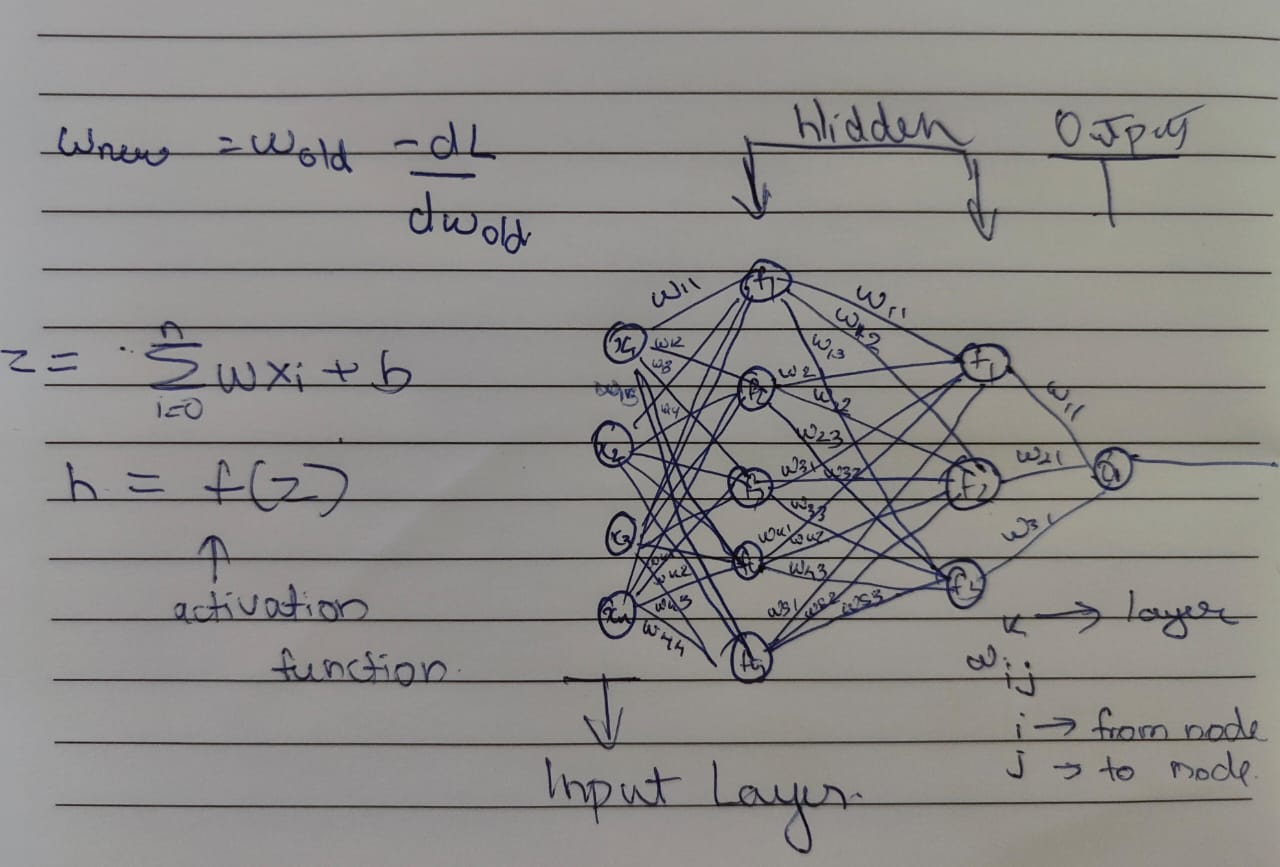

- After computing the output using the input value, weight and the bias we pass the value to a activation function which helps to regulate the output to acceptable and required range.
- This process of calculating node output is performed for all nodes in the network. As per the architecture Input -> hidden -> Output.
- Finally the output given from the output layer is compared with the loss function which gives us the error. This is called the forward propogation

- To reduce the weight and reach global minima, we use backproppgation do update the weight and bias of each node.

- This cycle of forward and backward propogation is called 1 epoch and this is how a MLP model is trained

Ans3
- Weights are intialized randomly from distribution(uniform, normal,etc). It follows 2 main conditions while initializing that is  the weights cannot be too small or big and weights cannot be equal. Types of Intitialization:

1. Normal Initializations : In this the weights will intialize from normal distribution which lies between (0,sigma)

- Uniform distribution : In this the weights will intialize from uniform distribution which lies between (-1/sqrt(fin),1/sqrt(fin))

2.Xavier Glorot Initializations : We use sigmoid function is this initialization.

- Normal  distribution : In this the weights will intialize from normal distribution which lies between (0,sigma)

- Uniform distribution : In this the weights will intialize from uniform distribution which lies between (-sqrt(6)/sqrt(fin+fout),sqrt(6)/sqrt(fin+fout))

3. He Initializations : In this the weights will intialize from normal distribution which lies between (0,sigma)

- Normal  distribution : In this the weights will intialize from normal distribution which lies between (0,sigma)

- Uniform distribution : In this the weights will intialize from uniform distribution which lies between  (-sqrt(6/fin),sqrt(6/fout))


Ans4.
-  Activation function is used to decide the  neuron should be activated or not. The output of the nodes that is weighted sum of weight and input along with bias is passed through to these activation function to control the output from nodes to a particular range. some examples of activation function are:
- Sigmoid Function
- Tanh Function
- Rectified Linear Units (Relu)
- Leaky relu
- Parameterized Relu
- Swish Function
- Softmax Function

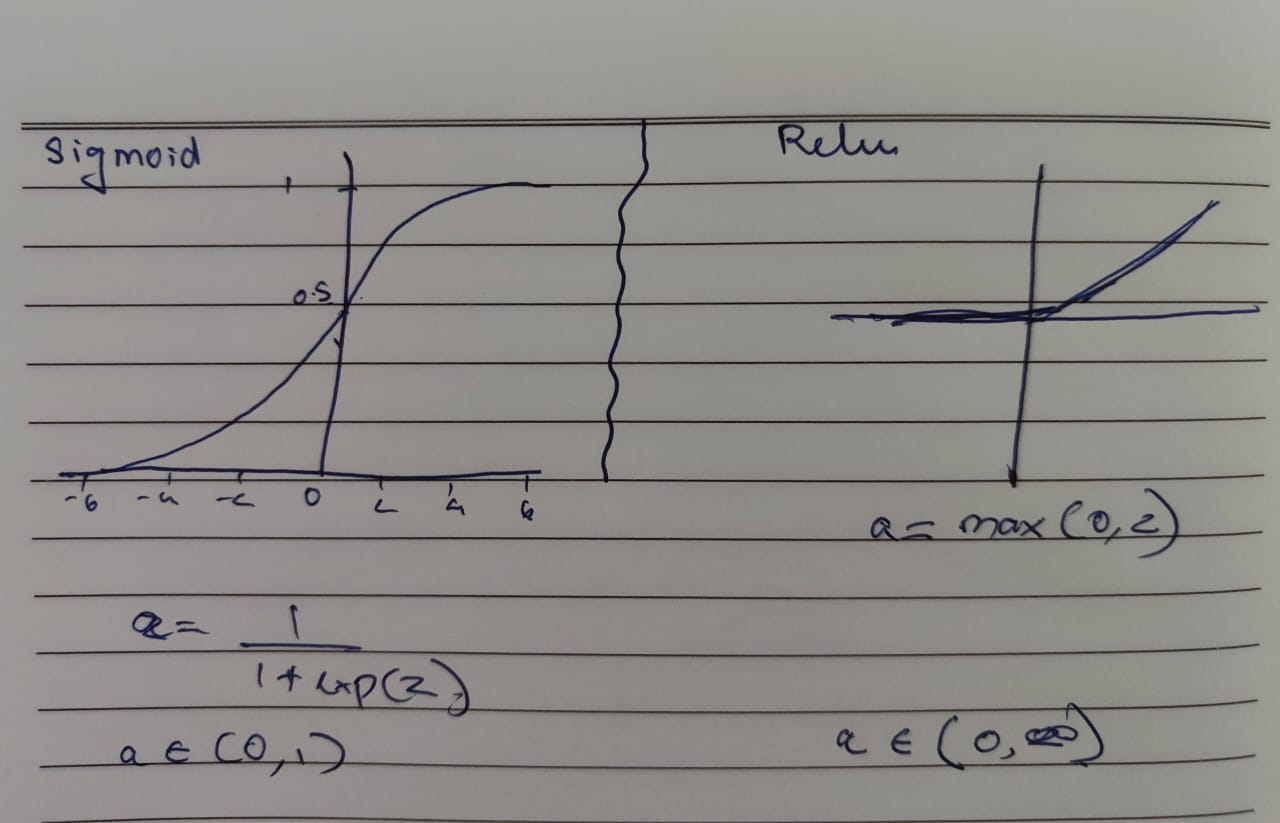


Ans5.

- Once we get the output from the output layer, we compare it with actual value and calculate the loss function which gives us the error. This is value which we get from the forward propogation is used in backward propogation.

This updating of weights is done with help of optimizers.Some of optimizers used in MLP are stochastic gradient descent, batch gradient decent, ADAGRAD, ADAM.

- It is used to  reduce the weight and reach global minima. We update the weight and bias of each node  using the chain rule in backproppgation



Ans6:
- Number of nodes in input layers is calculated by the number of features of the dataset which is going to be passed for training to the model.
- Number of nodes of output layer is given by the number of classes in target column(categorical column) or single node(regression problem)
- Number of nodes in hidden layers is a hyperparameter which depends upon the dataset and problem statement. There is no fixed value for this layer. As the number of nodes in hidden layer changes the performance of the model will also be affected.

# Load MNIST Dataset and build a Deep Learning Model.

### Things to be done:
    1- Load the MNIST Data
    2- Divide the data into train and test sets
    3- Plot the first 10 images using imshow()
    4- Convert images to categorical format
    5- Create a sequential model
    6- Plot the model summary
    7- Plot the architecture of the model with its layer shapes
    8- Compile the model
    9- Fit the model with 20 epochs (as per your desktop configuration)
    10- Plot Training and Testing Loss
    11- Save the model in .h5 extension
    12- Load the model
    13- Test the model

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import utils
from keras.utils import to_categorical


import warnings
warnings.filterwarnings('ignore')

In [7]:
data = mnist.load_data()

In [8]:
(x_train, y_train), (x_test, y_test) = data

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

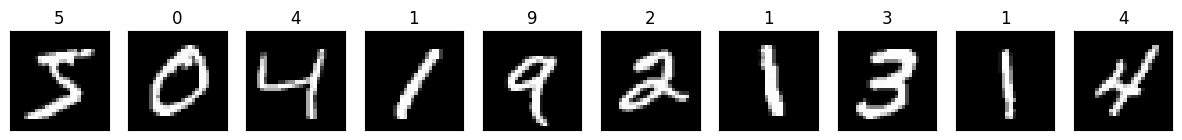

In [15]:
fig, axes = plt.subplots(ncols=10, sharex=True, sharey=False, figsize=(15, 5))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Model Building

In [23]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax', name= 'Output'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 Output (Dense)              (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


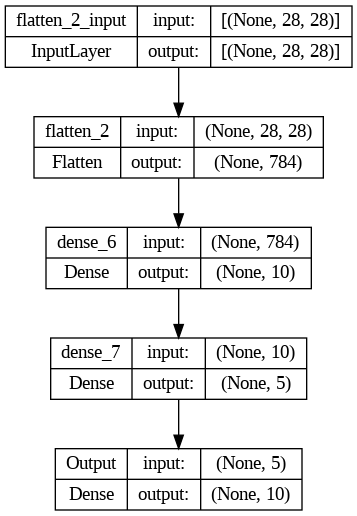

In [25]:
utils.plot_model(model, show_shapes=True)

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [27]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6994 - acc: 0.5316 - val_loss: 1.2401 - val_acc: 0.6577
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0362 - acc: 0.7189 - val_loss: 0.8809 - val_acc: 0.7684
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8049 - acc: 0.7838 - val_loss: 0.7260 - val_acc: 0.7992
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7124 - acc: 0.8027 - val_loss: 0.6786 - val_acc: 0.8102
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6567 - acc: 0.8189 - val_loss: 0.6531 - val_acc: 0.8074
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6446 - acc: 0.8191 - val_loss: 0.5614 - val_acc: 0.8471
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5957 - acc: 0.8307 - val_loss: 0.6109 - val_acc: 0.8308
Epoch 8/20
1875/1875 [==============================] - 5s 3m

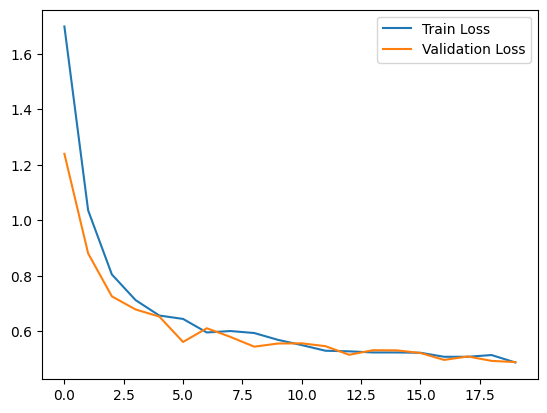

In [28]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

In [29]:
model.save('DL_mnist_test.h5')

In [32]:
model_reload = tf.keras.models.load_model('DL_mnist_test.h5')

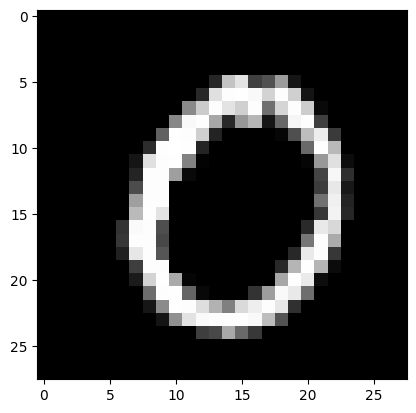

In [33]:
plt.imshow(x_test[101], cmap='gray')

In [34]:
x = np.reshape(x_test[101], (1, 28, 28))
predicted_label = np.argmax(model.predict(x))

# Printing the predicted class label
print(predicted_label)

1/1 [==============================] - 0s 91ms/step
0
